In [1]:
import numpy as np
import csv, os
import tikzplotlib

import matplotlib.pyplot as plt
%matplotlib inline

figures_dir = "../../../figures/batteries"

color0 = "#163D5C"
color1 = "#B1CCE3"
color2 = "#3AA99F"
color3 = "#EECF5A"
color4 = "#E65239"
color5 = "#B81F1F"
color6 = "#2368A2"
color7 = "#0B164D"
color8 = "#0A5085"

In [2]:
def grab_xrd_data(filename):
    angles = []
    counts = []

    with open(filename, "r", newline="") as file:
        data = csv.reader(file)
        for d in data:
            try:
                angles.append(float(d[0]))
                counts.append(float(d[1]))
            except ValueError:
                pass

    return np.array(angles), np.array(counts)

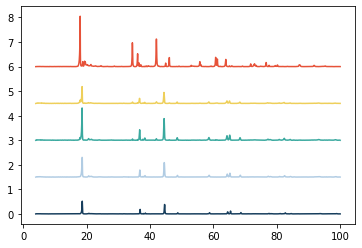

In [7]:
data_dict = {
    "LNMC": {"color": color0, "shift": 0},
    "LNMCS5": {"color": color1, "shift": 1.5e5},
    "LNMCS10": {"color": color2, "shift": 3e5},
    "LNMCS20": {"color": color3, "shift": 4.5e5},
    "LNCS": {"color": color4, "shift": 6e5},
}
plot_precision = 5

for data, spec in data_dict.items():

    filename = "data/PAUASK_" + data + "-out.csv"

    angles, counts = grab_xrd_data(filename)

    plt.plot(angles[::plot_precision], 
             (counts[::plot_precision] + spec["shift"])/1e5, 
             color=spec["color"], linewidth=1.5)
    
tikzplotlib.save(filepath=os.path.join(figures_dir, "xrd-data.tex"), 
                 add_axis_environment=False)